Установка модулей

In [18]:
!pip install opencv-python
!pip install easyocr
!pip install pytesseract
!apt install tesseract-ocr

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 15 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 0s (10.4 MB/s)
Selecting previously unselected package tesseract-ocr-eng.
(Reading database ... 120899 files and directories currently installed.)
Preparing to unpack .../tesseract-ocr-e

Импорты

In [28]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import gdown
import time
import re
from glob import glob
import matplotlib.pyplot as plt
%matplotlib inline
import easyocr
import pytesseract

In [34]:
PATH_TO_TESSERACT = r'/usr/bin/tesseract'   # прописывается реальный путь к установке tesseract-ocr
pytesseract.pytesseract.tesseract_cmd = PATH_TO_TESSERACT

Подгрузим изображения только для тестов

In [42]:
file_id = '1TgfHYBHMOS2I1DBN6r6aMxUO9dYeW44x'
gdown.download(f'https://drive.google.com/uc?id={file_id}', output = None, quiet = True)
!unzip -qo numbers.zip

In [50]:
def recognize_number(img_path):
    img = cv2.imread(img_path)
    img1 = cv2.resize(img.copy(), (640, 56))
    img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    _, img2 = cv2.threshold(img1, 127, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    cv2_imshow(img2)

    # определение easyOCR
    print('Определение easyOCR')
    str1 = ''
    start_time = time.time()
    reader = easyocr.Reader(['en','ru'], gpu=False, verbose=False)
    result = reader.readtext(img1)
    print()
    print(f'Время обработки: {time.time() - start_time:4.1f} сек')
    print(result[0][1])
    print(f'Точность определения текста: {result[0][2]*100:.2f}%')
    print()
    res = re.search(r'\d{7}-\d{7}-\d{7}/[0-9-]+', result[0][1])
    if res:
        str1 = res.group(0)
        print('Результат определения:')
        print(str1)
    else:
        print('Номер не определён!')
    print()

    # определение tesseract
    print('Определение tesseract')
    str2 = ''
    start_time = time.time()
    result = pytesseract.image_to_string(img1)
    print()
    print(f'Время обработки: {time.time() - start_time:4.1f} сек')
    print(result)
    res = re.search(r'\d{7}-\d{7}-\d{7}/[0-9-]+', result)
    if res:
        str2 = res.group(0)
        print('Результат определения:')
        print(str2)
    print()

    if str1 == str2:
        print('Результат совпадает!')
    else:
        print('Результат НЕ совпадает!')
    print()

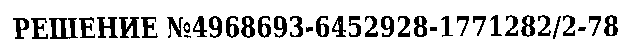

Определение easyOCR

Время обработки:  4.0 сек
РЕШЕНИЕ Ng4968693-6452928-1771282/2-78
Точность определения текста: 71.35%

Результат определения:
4968693-6452928-1771282/2-78

Определение tesseract

Время обработки:  0.3 сек
PEMEHUE Ne4968693-6452928-1771282/2-78

Результат определения:
4968693-6452928-1771282/2-78

Результат совпадает!



In [48]:
recognize_number('/content/big_1.jpg')

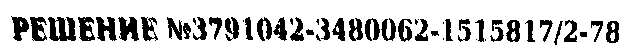

Определение easyOCR

Время обработки:  5.8 сек
PrmkHnt W70402 7480062-1515817/2-78
Точность определения текста: 20.68%

Номер не определён!

Определение tesseract

Время обработки:  0.4 сек
PEMIBHAE N3791042-3480062-1515817/2-78

Результат определения:
3791042-3480062-1515817/2-78

Результат НЕ совпадает!



In [51]:
recognize_number('/content/big_3.jpg')

# Функция определения номера

In [67]:
def get_number(img_path: str) -> str:
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # определение easyOCR
    str1 = ''
    reader = easyocr.Reader(['en','ru'], gpu=False, verbose=False)
    result = reader.readtext(img)
    if result:
        res = re.search(r'\d{7}-\d{7}-\d{7}/[0-9-]+', result[0][1])
        if res:
            str1 = res.group(0)

    # определение tesseract
    str2 = ''
    result = pytesseract.image_to_string(img)
    res = re.search(r'\d{7}-\d{7}-\d{7}/[0-9-]+', result)
    if res:
        str2 = res.group(0)

    if str2:
        return str2 # возвращаем результат определения terreract, как более точный, если есть
    elif str1:
        return str1 #  # возвращаем результат easyOCR, если он есть, но terreract не определил
    else:
        return None # только если ничего не определили, возвращаем None

In [69]:
print(get_number('/content/big_2.jpg'))

8824698-0507186-5165408/2-78


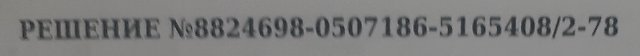

In [61]:
cv2_imshow(cv2.resize(cv2.imread('/content/big_2.jpg'), (640, 56)))